In [1]:
# imports
import pandas as pd
import numpy as np
import csv, os ,re, glob

In [2]:
names = ['Sectional_Sofas', 'Sleeper_Sofas', 'Reclining_Sofas', 'LoveSeats', 'Futons', 'Settles', 'Convertibles', 
         'Accent_Chairs', 'Coffee_Tables', 'TV_Stands', 'End_Tables', 'Console_Tables', 'Ottomans', 'Living_Room_Sets', 
         'Decorative_Pillows', 'Throw_Blankets', 'Area_Rugs', 'Wall_Arts', 'Table_Lamps', 'Floor_Lamps', 
         'Pendants_and_Chandeliers', 'Sconces', 'Baskets_and_Storage', 'Candles', 'Live_Plants', 'Artificial_Plants', 
         'Planters', 'Decorative_Accessories', 'Window_Coverings', 'Decorative_Mirrors', 'Dining_Sets', 
         'Dining_Tables', 'Dining_Chairs', 'Bar_Stools', 'Kitchen_Islands', 'Buffets_and_Sideboards', 'China_Cabinets', 
         'Bakers_Recks', 'Bedroom_Sets', 'Mattresses', 'Nightstands', 'Dressers', 'Beds', 'Bedframes', 'Bases', 'Vanities', 
         'Entryway_Furnitures', 'Desks', 'Desk_Chairs', 'Bookcases', 
         'File_Cabinets', 'Computer_Armoires', 'Drafting_Tables', 'Cabinets', 'Furniture_Sets']

In [3]:
# 기본 경로 설정(01-4.Crawling_integrated를 넣었던 폴더)
base_path = '/home/all'

# 파일 이름을 안전하게 만드는 함수
def sanitize_filename(filename):
    return re.sub(r'[^a-zA-Z]', '', filename)

# 이미지 경로를 가져오는 함수
def get_image_path(title, category):
    sanitized_title = sanitize_filename(title[:200])
    file_path = os.path.join(base_path, 'imgs', category, f"{sanitized_title}.jpg")
    return file_path if os.path.exists(file_path) else "File not found."

# 모든 CSV 파일을 처리하고 하나의 데이터프레임으로 합치는 함수
def process_all_csv_files():
    all_dfs = []
    for name in names:
        csv_file = os.path.join(base_path, f'product_infos/{name}_product_infos.csv')
        if os.path.exists(csv_file):
            df = pd.read_csv(csv_file)
            df['img_path'] = df['Title'].apply(lambda title: get_image_path(title, name))
            all_dfs.append(df)
    return pd.concat(all_dfs, ignore_index=True)

# 모든 데이터를 하나의 데이터프레임으로 합치기
combined_df = process_all_csv_files()


In [4]:
# 결과 확인
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30820 entries, 0 to 30819
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Category         30820 non-null  object
 1   Title            30820 non-null  object
 2   Price            30820 non-null  object
 3   Product_Info     30820 non-null  object
 4   Product_Feature  30820 non-null  object
 5   Product_Text     30233 non-null  object
 6   Img_URL          30076 non-null  object
 7   Product URL      30514 non-null  object
 8   img_path         30820 non-null  object
dtypes: object(9)
memory usage: 2.1+ MB


In [5]:
# path에 주소가 없는 경우(크롤링이 실패한 사례)
combined_df = combined_df[combined_df['img_path'] != 'File not found.'].reset_index(drop=True)
combined_df.info()  # 약 600개 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24069 entries, 0 to 24068
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Category         24069 non-null  object
 1   Title            24069 non-null  object
 2   Price            24069 non-null  object
 3   Product_Info     24069 non-null  object
 4   Product_Feature  24069 non-null  object
 5   Product_Text     23605 non-null  object
 6   Img_URL          24054 non-null  object
 7   Product URL      23781 non-null  object
 8   img_path         24069 non-null  object
dtypes: object(9)
memory usage: 1.7+ MB


In [6]:
import ast

# 'Category' 열의 문자열을 리스트로 변환
combined_df['Category'] = combined_df['Category'].apply(ast.literal_eval)

In [7]:
# 카테고리 확인

# # Category 열에서 [3]번째 요소 추출
# third_elements = combined_df['Category'].apply(lambda x: x[3] if len(x) > 3 else None)

# # 추출된 요소들의 유일한 값 확인
# unique_third_elements = third_elements.unique()
# unique_third_elements

In [8]:
# 'Category' 열이 리스트 형태일 때 'Desks'를 포함하는 행 필터링
home_office_desks_df = combined_df[combined_df['Category'].apply(lambda x: x[3] == 'Home Office Desks' if len(x) > 3 else False)]
home_office_desks_df.reset_index(drop=True, inplace=True)

# 결과 확인
home_office_desks_df.head()

,Category,Title,Price,Product_Info,Product_Feature,Product_Text,Img_URL,Product URL,img_path
0,"[Home & Kitchen, Furniture, Home Office Furnit...",homestyles Dover 71.5 Inches High by 30 Inches...,$449.99,"{'Brand': 'homestyles', 'Color': 'Off White', ...","{'Material': 'Wood', 'Style': 'Dover', 'Number...",Rafted of poplar solids and engineered wood pa...,https://m.media-amazon.com/images/W/MEDIAX_792...,https://www.amazon.com/homestyles-Inches-Drawe...,/home/all/imgs/Buffets_and_Sideboards/homestyl...
1,"[Home & Kitchen, Furniture, Home Office Furnit...",A AIRLLEN Computer Desk 63 Inch Modern Simple ...,$169.99,"{'Brand': 'A AIRLLEN', 'Product Dimensions': '...","{'Shape': 'Rectangular', 'Desk design': 'Compu...",【Actual Table Dimension】63 L x 23.62 D x 28.35...,https://m.media-amazon.com/images/I/71I9DrrwH9...,https://www.amazon.com/AIRLLEN-Computer-Workst...,/home/all/imgs/Desks/AAIRLLENComputerDeskInchM...
2,"[Home & Kitchen, Furniture, Home Office Furnit...",Cubiker Computer Home Office Desk with Drawers...,$79.99,"{'Brand': 'Cubiker', 'Product Dimensions': '23...","{'Shape': 'Rectangular', 'Desk design': 'Compu...",Modern Confident Style: Cubiker office compute...,https://m.media-amazon.com/images/I/81tfZZqqGd...,https://www.amazon.com/Cubiker-Computer-Office...,/home/all/imgs/Desks/CubikerComputerHomeOffice...
3,"[Home & Kitchen, Furniture, Home Office Furnit...",Rise UP Dual Motor Electric Standing Desk 60x3...,$489.99,"{'Brand': 'Uncaged Ergonomics', 'Product Dimen...","{'Shape': 'Rectangular', 'Desk design': 'Compu...","A beautiful, durable, dual-motor electric adju...",https://m.media-amazon.com/images/I/71Weo55ETw...,https://www.amazon.com/Electric-Adjustable-Erg...,/home/all/imgs/Desks/RiseUPDualMotorElectricSt...
4,"[Home & Kitchen, Furniture, Home Office Furnit...","CubiCubi Computer Desk, 40 inch Home Office De...",$54.99,"{'Brand': 'CubiCubi', 'Product Dimensions': '1...","{'Shape': 'Rectangular', 'Desk design': 'Compu...",Modern Simple Style: This computer desk suits ...,https://m.media-amazon.com/images/I/71TfWerRrA...,https://www.amazon.com/Cubicubi-Computer-Offic...,/home/all/imgs/Desks/CubiCubiComputerDeskinchH...


In [9]:
home_office_desks_df = home_office_desks_df[home_office_desks_df['img_path'] != 'File not found.']

In [10]:
import ast

# 'Style' 값을 추출하고 유니크한 값들 찾기
styles = []
for info in home_office_desks_df['Product_Info']:
    try:
        product_info = ast.literal_eval(info)  # 문자열을 딕셔너리로 변환
        if 'Style' in product_info:
            styles.append(product_info['Style'])
    except ValueError:
        continue  # 변환 중 오류 발생 시 무시

unique_styles = set(styles)  # 중복 제거
style_count = len(unique_styles)  # 개수 계산

print(f"유니크한 'Style'의 개수: {style_count}")
print("스타일 목록:", unique_styles)

유니크한 'Style'의 개수: 173
스타일 목록: {'Desk with Storage Bin', 'CubiCubi Simple Gaming Desk with Charging Side Table', '1 Pack', 'Morden', 'Asian', 'L shaped Desk', 'Desk with Keyboard Tray', 'Country Rustic', 'Antique', 'Industrial, Rustic, Antique', 'L shaped Desk with Fabric Drawer', 'Standard', 'American', 'Wall Mount Table', 'Office', 'Designs2Go No Tools Desk and Console Table Office Set', 'Gaming', 'Furologee 66" L Shaped Computer Desk & Printer Stand', 'Scandinavian', 'modern minimalist', 'Elegant', 'Farmhouse, Modern Industrial', 'Commercial', 'CONTEMPORARY,MODERN', "35''Brown", 'Basic', 'Industrial,Modern', 'Split Board', 'Modern', 'Industrial Modern', 'standing desk frame', 'Transitional', 'Desk with Storage', 'Gaming Desk', '54.3x54.3 inch', 'Rockdale', 'Rustic, modern', 'Country Rustic, Modern,Gaming,Computer ,Studio,Work,Office', 'Gaming/Music Studio Desk', 'Dual Surface', 'Double Drawer & Shelf', 'office', 'Retro', 'Simple', 'Stanford', 'Office Desk', 'Gaming desk', 'L Shaped D

In [11]:
# 특정 스타일을 남기기전 데이터
home_office_desks_df.shape

(3663, 9)

In [12]:
import ast

# 스타일을 소문자로 변환하고, 잘못 기입된 스타일을 제거하며, 유사한 스타일을 통합하는 함수 정의
def clean_and_group_styles(style_list):
    # 허용된 스타일 목록
    allowed_styles = ['modern', 'contemporary', 'rustic', 'vintage', 'industrial', 'traditional', 'minimalist', 'scandinavian', 'classic', 'retro', 'art deco', 'mid-century modern', 'glam', 'coastal', 'shaker', 'mission', 'eclectic']

    # 결과를 저장할 딕셔너리
    grouped_styles = {style: 0 for style in allowed_styles}

    for style in style_list:
        # 스타일을 소문자로 변환
        cleaned_style = style.lower()

        # 잘못 기입된 스타일 제거 (숫자, 특수 문자, 또는 허용된 스타일 목록에 없는 경우)
        if any(char.isdigit() or char in ['[', ']', '{', '}', '/', '\\'] for char in cleaned_style) or cleaned_style not in allowed_styles:
            continue
        
        # 스타일 개수 세기
        grouped_styles[cleaned_style] += 1

    return grouped_styles

# 스타일 목록 추출
styles = []
for info in home_office_desks_df['Product_Info']:
    try:
        product_info = ast.literal_eval(info)  # 문자열을 딕셔너리로 변환
        if 'Style' in product_info:
            styles.append(product_info['Style'])
    except ValueError:
        continue  # 변환 중 오류 발생 시 무시

# 스타일 목록 정제 및 통합
grouped_styles = clean_and_group_styles(styles)

# 결과 출력
print("정제된 스타일 개수:", sum(grouped_styles.values()))
print("스타일 그룹화 결과:", grouped_styles)

정제된 스타일 개수: 2811
스타일 그룹화 결과: {'modern': 1873, 'contemporary': 230, 'rustic': 198, 'vintage': 27, 'industrial': 242, 'traditional': 26, 'minimalist': 14, 'scandinavian': 4, 'classic': 104, 'retro': 10, 'art deco': 4, 'mid-century modern': 59, 'glam': 2, 'coastal': 1, 'shaker': 1, 'mission': 3, 'eclectic': 13}


In [13]:
grouped_styles

{'modern': 1873,
 'contemporary': 230,
 'rustic': 198,
 'vintage': 27,
 'industrial': 242,
 'traditional': 26,
 'minimalist': 14,
 'scandinavian': 4,
 'classic': 104,
 'retro': 10,
 'art deco': 4,
 'mid-century modern': 59,
 'glam': 2,
 'coastal': 1,
 'shaker': 1,
 'mission': 3,
 'eclectic': 13}

In [14]:
styles = ['modern', 'contemporary', 'rustic', 'vintage', 'industrial', 'traditional', 'minimalist', 'scandinavian', 'classic', 'retro', 'art deco', 'mid-century modern', 'glam', 'coastal', 'shaker', 'mission', 'eclectic']

In [16]:
# 특정 스타일만 남기긴 데이터
def is_valid_style(info):
    try:
        product_info = ast.literal_eval(info)
        if 'Style' in product_info:
            style = product_info['Style'].lower()  # 소문자로 변환
            return any(valid_style in style for valid_style in styles)
    except ValueError:
        return False
    return False

# 올바른 스타일을 포함하는 행만 필터링
home_office_desks_df = home_office_desks_df[home_office_desks_df['Product_Info'].apply(is_valid_style)]

# 필터링된 데이터프레임 저장
home_office_desks_df.shape # 대략 20% 손실

(2973, 9)

In [17]:
home_office_desks_df.to_pickle('/home/myeong/home_office_desks_df.pkl')

In [19]:
# Style 라벨이 없으면 버리기
import ast

def extract_style(row):
    for col in ['Product_Info', 'Product_Feature']:
        try:
            info_dict = ast.literal_eval(row[col])
            if 'Style' in info_dict:
                return info_dict['Style']
            if 'style' in info_dict:
                return info_dict['style']
        except (ValueError, SyntaxError):
            continue
    return None

# Apply the function to each row
combined_df['Style'] = combined_df.apply(extract_style, axis=1)

# Count the total number of rows before dropping
initial_row_count = len(combined_df)

# Drop rows where 'Style' is None
combined_df.dropna(subset=['Style'], inplace=True)

# Count the number of dropped rows
dropped_row_count = initial_row_count - len(combined_df)
print(f"Number of rows dropped: {dropped_row_count}")

Number of rows dropped: 7492


In [20]:
# Write the unique styles to a text file
unique_styles = combined_df['Style'].unique()
with open('unique_styles.txt', 'w') as file:
    for style in unique_styles:
        file.write(f"{style}\n")

# Print a message indicating that the file has been written
print("Unique styles have been written to 'unique_styles.txt'")


Unique styles have been written to 'unique_styles.txt'


In [21]:
import ast

# Define valid styles
valid_styles = ['modern', 'contemporary', 'classic', 'urban', 'country', 'unique', 'minimalism']

# Modified categorize_style function
def map_style(style):
    categories = {
        "Modern": ["Modern",'Contemporary,Modern','French','Copenhagen','Modern Contemporary','Italian', "European",'Mid-Century Modern, Contemporary','Eclectic, modern, traditional','Modern, Classic', 'Modern couch','contemporary and traditional, modern','Casual, Modern','Modern, Contemporary',"Modern Minimalist", "High Gloss", "Scandinavian", "Nordic", "European", "Japanese", "Mid Century Modern",'Mid-Century Modern,Contemporary','Mid-Centuryum', "Contemporary Modern", "Minimalist Modern"],
        "Contemporary": ["Contemporary", "Streamlined", "Unadorned", "Sleek", "Understated", "Clean Lines", "Modern Contemporary", "Contemporary Chic"],
        "Classic": [ "Classic",'Classic Contemporary', "Antique", "Art Deco", "Colonial", "Baroque", "Vintage", "French", "Victorian", "Traditional", "Retro","Traditional Classic", "Vintage Classic"],
        "Urban": ["Urban", "Metropolitan", "City Style", "Modern Urban", "Urban Contemporary", "Industrial", "Loft", "Modern Industrial", "Rustic Industrial", "Industrial Retro Style", "Metropolitan","Urban Industrial", "Industrial Chic",'Retro'],
        "Country": ["Country", "Rustic Country", "Country Style", "Rural", "Pastoral", "Provincial","Rustic", "Farmhouse", "Country Rustic", "Shabby Chic", "Lodge", "Reclaimed Wood","Country Rustic", "Rustic Charm"],
        "Unique": ["Unique",  "One-of-a-Kind", "Unique Design","Free Style", "Wild", "Fantasy Plus", "Boho Style", "Bohemian","Eclectic","Bohemian Eclectic", "Eclectic Mix","Fusion", "Quirky", "Galaxy", "Stars",'Bold eclectic'],
        "Minimalism": ["Minimalism", "Simple", "Zen", "Bare", "Sparse", "Minimalist","Simplistic Minimalism"]
    }

    for key, values in categories.items():
        if style in values:
            return key
    return style
 
    

# Simplified is_valid_style function
def is_valid_style(style):
    mapped_style = map_style(style)
    if mapped_style.lower() in valid_styles:
        return mapped_style
    else:
        return None

# Apply the function to the 'Style' column of the DataFrame
combined_df['Style'] = combined_df['Style'].apply(is_valid_style)




In [22]:
# Before dropping rows, count the total number of rows
initial_row_count = len(combined_df)

# Drop rows where 'Style' is None
combined_df.dropna(subset=['Style'], inplace=True)

# Count the number of dropped rows
dropped_row_count = initial_row_count - len(combined_df)
print(f"Number of rows dropped: {dropped_row_count}")
print(f'Number of current rows: {len(combined_df)}')

# Count the occurrences of each unique style value
style_counts = combined_df['Style'].value_counts()
print("Counts for each Style:")
print(style_counts)


Number of rows dropped: 4147
Number of current rows: 8716
Counts for each Style:
Style
Modern          6150
Classic         1101
Contemporary     635
Country          438
Urban            198
Minimalism       139
Unique            53
modern             2
Name: count, dtype: int64


In [23]:
combined_df = combined_df[['img_path', 'Style']].reset_index(drop=True)
combined_df

,img_path,Style
0,/home/all/imgs/Sectional_Sofas/HONBAYModularSo...,Modern
1,/home/all/imgs/Sectional_Sofas/CHITAOversizedM...,Modern
2,/home/all/imgs/Sectional_Sofas/HONBAYModularSl...,Modern
3,/home/all/imgs/Sectional_Sofas/JUMMICOConverti...,Modern
4,/home/all/imgs/Sectional_Sofas/DevionFurniture...,Contemporary
...,...,...
8711,/home/all/imgs/Vanities/LAVIEVERTVanitySetwith...,Modern
8712,/home/all/imgs/Vanities/HillsdaleFurnitureKath...,Modern
8713,/home/all/imgs/Vanities/SogesHomeVanityTableSe...,Modern
8714,/home/all/imgs/Vanities/CyclysioVanityDeskwith...,Modern


In [30]:

from collections import Counter

# 1. Calculate the frequency of each style
style_counts = Counter(combined_df['Style'])
print(combined_df['Style'].map(style_counts).unique())

[6150  635 1101  139  438  198   53    2]


In [33]:

# 2. Filter out styles with only one member
combined_df = combined_df[combined_df['Style'].map(style_counts) > 10]
len(combined_df)

8714

Error opening image: /home/all/imgs/Sectional_Sofas/VANOMiUShapedSectionalSofaCouchCorduroyFabricModernCozyJumboSizeSeaterSofaDoubleChaiseLongueBeige.jpg


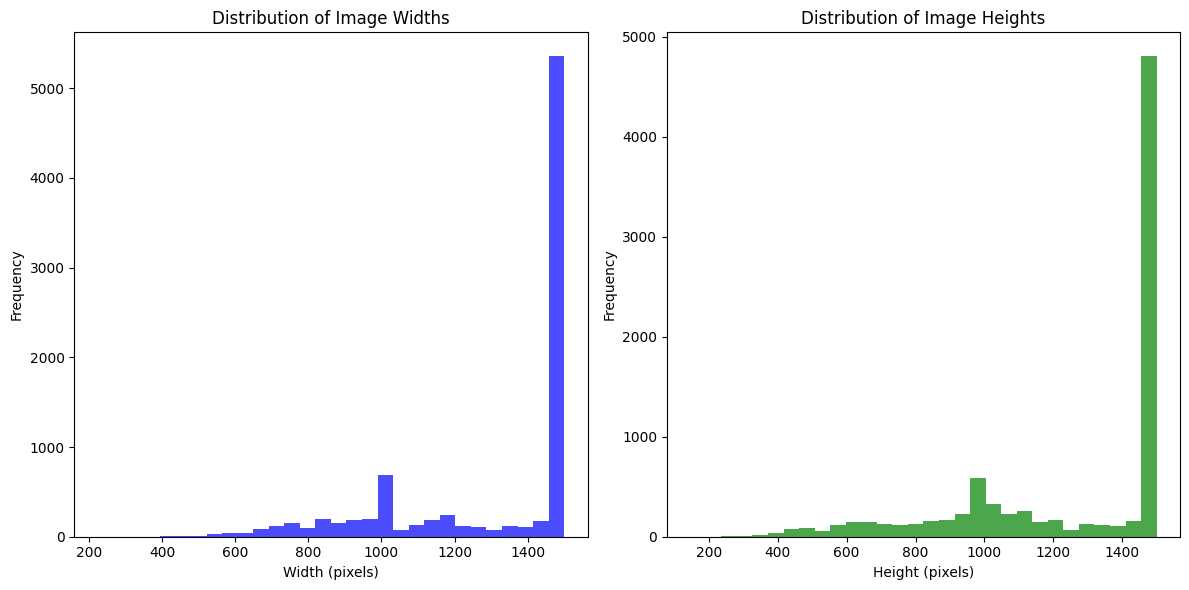

In [12]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Lists to store the dimensions
widths = []
heights = []

# Loop through image paths and collect dimensions
for img_path in combined_df['img_path']:
    try:
        with Image.open(img_path) as img:
            width, height = img.size
            widths.append(width)
            heights.append(height)
    except IOError:
        print(f"Error opening image: {img_path}")

# Plotting the distributions
plt.figure(figsize=(12, 6))

# Distribution of widths
plt.subplot(1, 2, 1)
plt.hist(widths, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Image Widths')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')

# Distribution of heights
plt.subplot(1, 2, 2)
plt.hist(heights, bins=30, color='green', alpha=0.7)
plt.title('Distribution of Image Heights')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [34]:
import numpy as np
from PIL import Image
# import h5py  # for .h5 file
import os

def process_image(image_path):
    try:
        # Open the image file
        with Image.open(image_path) as img:
            # Resize and convert to RGB
            img = img.resize((64, 64)).convert('RGB')
            # Convert to numpy array and normalize
            img_array = np.asarray(img) / 255.0
            # # Transpose the array to have channels first
            # img_array = img_array.transpose((2, 0, 1))
            return img_array
    except IOError:
        print(f"Error in processing image: {image_path}")
        return None

# Assuming combined_df is your DataFrame
# Process each image and collect them in a list
images = []
styles = []
for _, row in combined_df.iterrows():
    img_array = process_image(row['img_path'])
    if img_array is not None:
        images.append(img_array)
        styles.append(row['Style'])

# Convert lists to numpy arrays
images = np.array(images)
styles = np.array(styles)

# # Saving to .h5 file
# with h5py.File('data.h5', 'w') as h5file:
#     h5file.create_dataset('images', data=images)
#     h5file.create_dataset('styles', data=styles)

# Or, saving to .npy file
np.save('images64.npy', images)
np.save('styles64.npy', styles)


Error in processing image: /home/all/imgs/Sectional_Sofas/VANOMiUShapedSectionalSofaCouchCorduroyFabricModernCozyJumboSizeSeaterSofaDoubleChaiseLongueBeige.jpg


In [35]:
import h5py

# Open the .h5 file in read mode
with h5py.File('image.h5', 'r') as h5file:
    # Access the dataset
    images_dataset = h5file['images']
    # Get the shape of the dataset
    images_shape = images_dataset.shape

print("Shape of the 'images' dataset:", images_shape)

Shape of the 'images' dataset: (8713, 1024, 1024, 3)
